<a href="https://colab.research.google.com/github/Christelleelkhoury/AAI614_-ElKhoury-/blob/main/Week%203/Notebook3.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AAI614: Data Science & its Applications

*Notebook 3.2: Practice with Data Cleaning*


In [1]:
import pandas as pd
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

Exercise I. Load the following datafile from GitHub

In [2]:
grads = pd.read_csv("https://raw.githubusercontent.com/harmanani/AAI614/main/Week%203/grads.csv")

In [3]:
grads

,Student Name,Avg Hours Studies per Week,GPA,University,Sense of Humour (0-5),Salary
0,George,20,NaN,NYU,3.0,$40k
1,Jerry,35,3.5,Columbia,5.0,$80k
2,Elaine,55,4.0,Columbia,4.2,$60k
3,Cosmo,5,2.0,City College,2.0,$25k
4,Newman,25,2.8,City College,0.0,$50k
5,Frank,35,3.0,Festivus Uni,NaN,$40k
6,Estelle,100,3.2,Festivus Uni,1.7,$0k
7,Leo,15,2.4,Festivus Uni,0.0,$35k
8,Rachel,50,4.0,Columbia,NaN,$75k


Question 1: Identify all the outliers in the above data.  Justify your answers using objective measures.

Methods to find outliers:
1. Visualizing with a boxplot from Matplotlib
2. Using the 1.5 IQR rule.

In [17]:
grads['Salary'] = grads['Salary'].astype(str).apply(lambda x: int(x.replace('\n', '').replace(' ', '').replace('k', '000')))

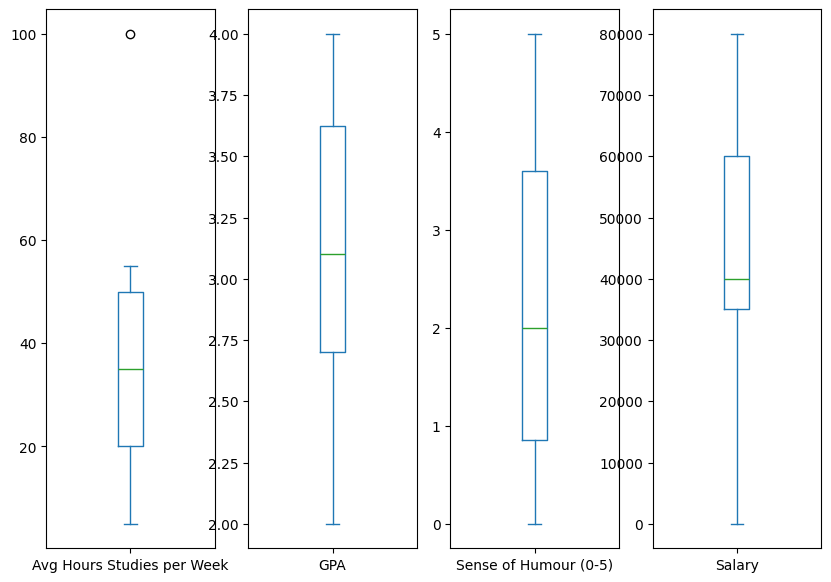

In [28]:
import matplotlib.pyplot as plt

grads.plot(kind = 'box', subplots = True, figsize = (10, 7))
plt.show()

In [29]:
#create iqr function to find the outliers values in a column which will return the column name and the value of the outlier
def iqr(col):
  Q1 = col.quantile(0.25)
  Q3 = col.quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5*IQR
  upper_bound = Q3 + 1.5*IQR

  outliers = {col.name: col[(col < lower_bound) | (col > upper_bound)].tolist()}

  return outliers

outliers_hours_studies = iqr(grads['Avg Hours Studies per Week'])
outliers_hours_studies

{'Avg Hours Studies per Week': [100]}

In [30]:
outliers_GPA = iqr(grads['GPA'])
outliers_GPA

{'GPA': []}

In [31]:
outliers_soh = iqr(grads['Sense of Humour (0-5)'])
outliers_soh

{'Sense of Humour (0-5)': []}

In [18]:
iqr(grads['Salary'])

{'Salary': []}

As per both the plot and the IQR rule, we have one outlier: 100 hours of studies per week for the student named Estelle.

Question 2: There are various data that are missing.  Fill-in the missing data or delete the rows/columns that you think you should delete.  Justify your answer

In [19]:
print(grads.isnull().sum())

Student Name                  0
Avg Hours Studies per Week    0
GPA                           1
University                    0
Sense of Humour (0-5)         2
Salary                        0
dtype: int64


It’s better to use the median value for imputation in the case of outliers.

In [34]:
grads['GPA']= grads['GPA'].fillna(grads['GPA'].median())

Mode is the most frequently occurring value. It is used in the case of categorical features.

In [36]:
grads['Sense of Humour (0-5)'] = grads['Sense of Humour (0-5)'].fillna(grads['Sense of Humour (0-5)'].mode()[0])

In [37]:
grads.isnull().sum()

,0
Student Name,0
Avg Hours Studies per Week,0
GPA,0
University,0
Sense of Humour (0-5),0
Salary,0


Question 3: Reload the data and fill-in the data using mean method as well as the frequent method.

In [38]:
grads = pd.read_csv("https://raw.githubusercontent.com/harmanani/AAI614/main/Week%203/grads.csv")
grads

,Student Name,Avg Hours Studies per Week,GPA,University,Sense of Humour (0-5),Salary
0,George,20,NaN,NYU,3.0,$40k
1,Jerry,35,3.5,Columbia,5.0,$80k
2,Elaine,55,4.0,Columbia,4.2,$60k
3,Cosmo,5,2.0,City College,2.0,$25k
4,Newman,25,2.8,City College,0.0,$50k
5,Frank,35,3.0,Festivus Uni,NaN,$40k
6,Estelle,100,3.2,Festivus Uni,1.7,$0k
7,Leo,15,2.4,Festivus Uni,0.0,$35k
8,Rachel,50,4.0,Columbia,NaN,$75k


If there are outliers, then the mean will not be appropriate. In such cases, outliers need to be treated first.

In [40]:
grads.drop(grads[grads['Student Name'] == 'Estelle'].index, inplace=True)
grads

,Student Name,Avg Hours Studies per Week,GPA,University,Sense of Humour (0-5),Salary
0,George,20,NaN,NYU,3.0,$40k
1,Jerry,35,3.5,Columbia,5.0,$80k
2,Elaine,55,4.0,Columbia,4.2,$60k
3,Cosmo,5,2.0,City College,2.0,$25k
4,Newman,25,2.8,City College,0.0,$50k
5,Frank,35,3.0,Festivus Uni,NaN,$40k
7,Leo,15,2.4,Festivus Uni,0.0,$35k
8,Rachel,50,4.0,Columbia,NaN,$75k


In [41]:
grads['GPA'] = grads['GPA'].fillna(grads['GPA'].mean())
grads['Sense of Humour (0-5)'] = grads['Sense of Humour (0-5)'].fillna(grads['Sense of Humour (0-5)'].mean())

In [42]:
grads

,Student Name,Avg Hours Studies per Week,GPA,University,Sense of Humour (0-5),Salary
0,George,20,3.1,NYU,3.000000,$40k
1,Jerry,35,3.5,Columbia,5.000000,$80k
2,Elaine,55,4.0,Columbia,4.200000,$60k
3,Cosmo,5,2.0,City College,2.000000,$25k
4,Newman,25,2.8,City College,0.000000,$50k
5,Frank,35,3.0,Festivus Uni,2.366667,$40k
7,Leo,15,2.4,Festivus Uni,0.000000,$35k
8,Rachel,50,4.0,Columbia,2.366667,$75k


Exercise II. Run the cell below to create a new dataframe called `df_miss`.  Its first column will contain some missing values.

In [43]:
import pandas as pd
import numpy as np
import random

nrows = 10
ncols = 5

# set a seed for random number generation
np.random.seed(314)
# create an array filled with random data
data = np.array(np.random.rand(nrows, ncols))
# put the data to a pandas dataframe
df_miss = pd.DataFrame(data)
# rename the columns
df_miss.columns = ['col_'+str(ii) for ii in range(ncols)]

# randomly set some values to missing
ix0 = np.random.randint(nrows, size=3)
ix1 = np.random.randint(nrows, size=3)

df_miss['col_0'][ix0] = np.nan
df_miss['col_1'][ix1] = np.nan

print(df_miss)

      col_0     col_1     col_2     col_3     col_4
0       NaN       NaN  0.265048  0.783205  0.918001
1  0.827355       NaN  0.260480  0.911763  0.260757
2  0.766376  0.261531  0.122291  0.386006  0.840081
3       NaN       NaN  0.633110  0.584766  0.581232
4  0.677205  0.687155  0.438927  0.320927  0.570552
5       NaN  0.861074  0.834805  0.105766  0.060408
6  0.596882  0.792395  0.226356  0.535201  0.136066
7  0.372244  0.151977  0.429822  0.792706  0.406957
8  0.177850  0.909252  0.545331  0.100497  0.718721
9  0.978429  0.309776  0.260126  0.662900  0.139720


<ipython-input-43-a77e6ba6a8cb>:21: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_miss['col_0'][ix0] = np.nan
<ipython-input-43-a77e6ba6a8cb>:22: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting 

Impute the missing values (NaN) in `col_0` (but not `col_1`) with the median.  Store the values in the dataframe by using the parameter `inplace`.  Print the dataframe.

In [44]:
df_miss['col_0'].fillna(df_miss['col_0'].median(), inplace=True)

print(df_miss)


      col_0     col_1     col_2     col_3     col_4
0  0.677205       NaN  0.265048  0.783205  0.918001
1  0.827355       NaN  0.260480  0.911763  0.260757
2  0.766376  0.261531  0.122291  0.386006  0.840081
3  0.677205       NaN  0.633110  0.584766  0.581232
4  0.677205  0.687155  0.438927  0.320927  0.570552
5  0.677205  0.861074  0.834805  0.105766  0.060408
6  0.596882  0.792395  0.226356  0.535201  0.136066
7  0.372244  0.151977  0.429822  0.792706  0.406957
8  0.177850  0.909252  0.545331  0.100497  0.718721
9  0.978429  0.309776  0.260126  0.662900  0.139720


<ipython-input-44-b5473a57b049>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_miss['col_0'].fillna(df_miss['col_0'].median(), inplace=True)


Impute the missing values in `col_1` with value 0.  Store the values in the dataframe by using the parameter `inplace`.  Print the dataframe.

In [45]:
df_miss['col_1'].fillna(0, inplace=True)
print(df_miss)

      col_0     col_1     col_2     col_3     col_4
0  0.677205  0.000000  0.265048  0.783205  0.918001
1  0.827355  0.000000  0.260480  0.911763  0.260757
2  0.766376  0.261531  0.122291  0.386006  0.840081
3  0.677205  0.000000  0.633110  0.584766  0.581232
4  0.677205  0.687155  0.438927  0.320927  0.570552
5  0.677205  0.861074  0.834805  0.105766  0.060408
6  0.596882  0.792395  0.226356  0.535201  0.136066
7  0.372244  0.151977  0.429822  0.792706  0.406957
8  0.177850  0.909252  0.545331  0.100497  0.718721
9  0.978429  0.309776  0.260126  0.662900  0.139720


<ipython-input-45-9b40d62ab700>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_miss['col_1'].fillna(0, inplace=True)
